# Clustering for Total Lubmarine

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### Attention
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses
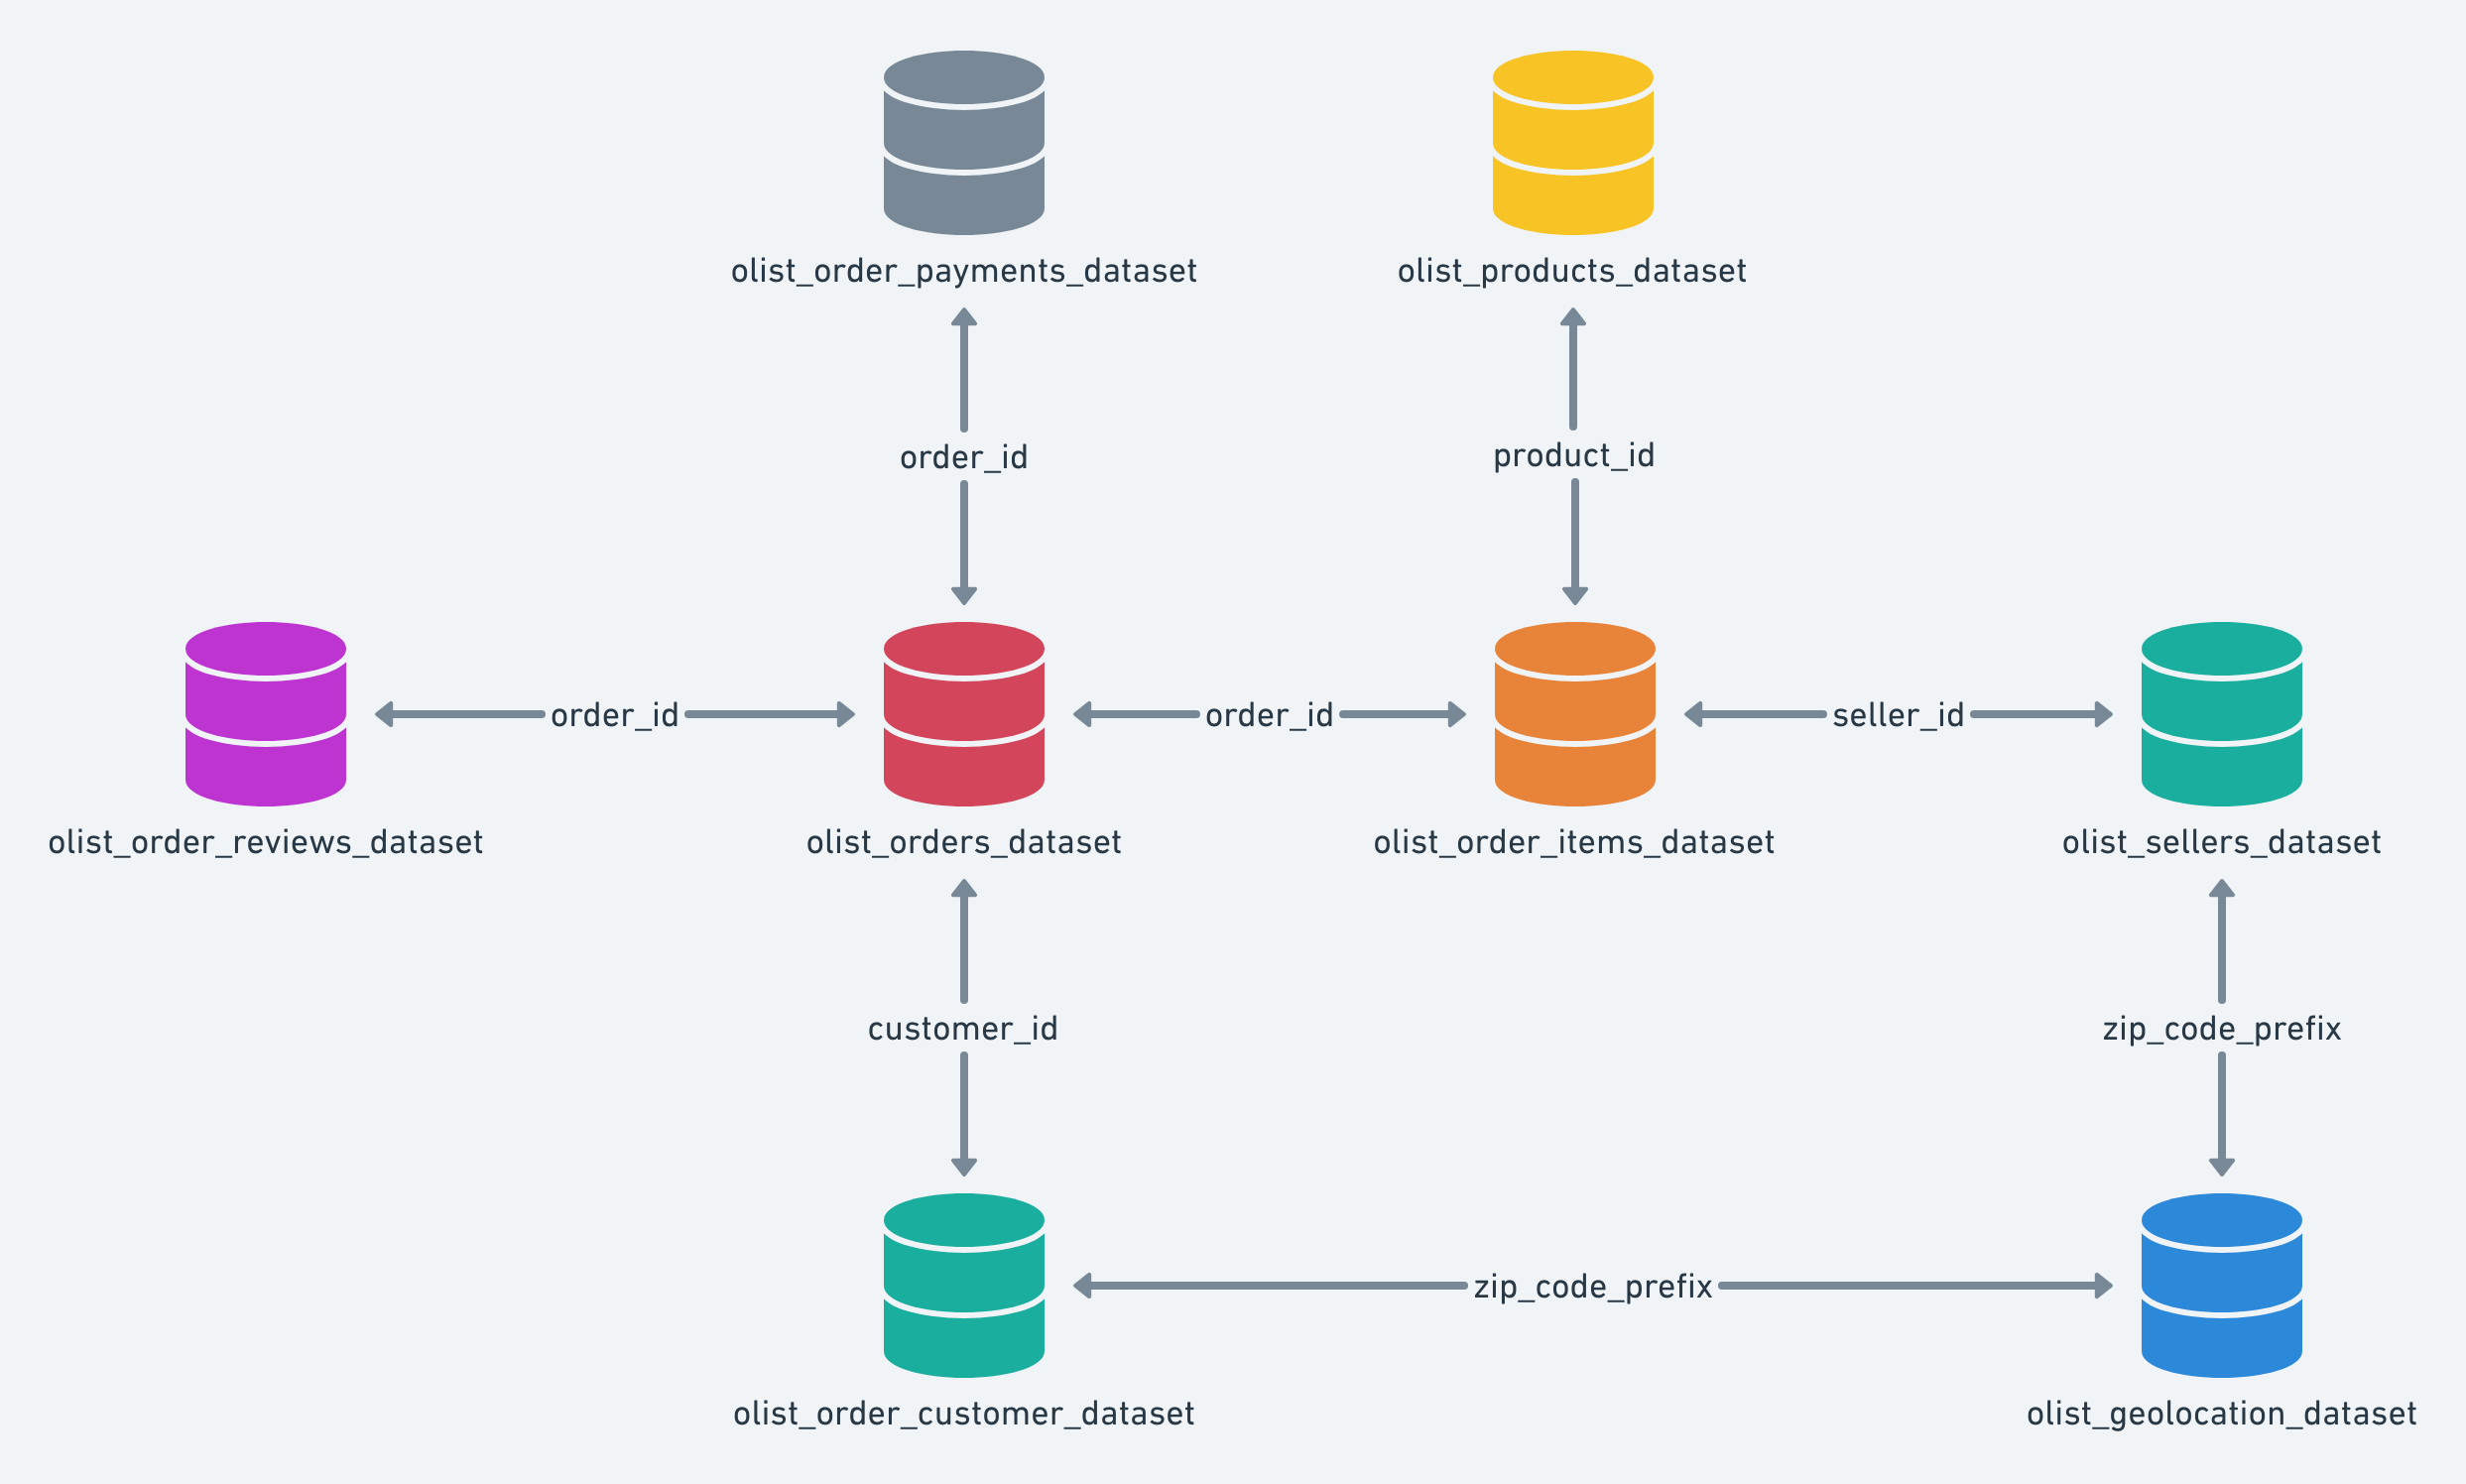


Here are some inspiration for possible outcomes from this dataset.

* **NLP**:
This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

* **Clustering**:
Some customers didn't write a review. But why are they happy or mad?

* **Sales Prediction**:
With purchase date information you'll be able to predict future sales.

* **Delivery Performance**:
You will also be able to work through delivery performance and find ways to optimize delivery times.

* **Product Quality**:
Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

* **Feature Engineering**:
Create features from this rich dataset or attach some external public information to it.


In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/Lenovo/Documents/IA School/IA School 2/Clustering_Total_Lubmarine/Data/"
data = []
names = []
filesize = {}
for file in os.listdir(path):
    if file[:5] == 'olist':
        name = file[6:-12]
    else:
        name = file[17:-4]
    locals()[name] = pd.read_csv(os.path.join(path, file), sep =",")
    data.append(locals()[name])
    names.append(name)
    filesize[name]= locals()[name].shape
    print(name)

customers
geolocation
orders
order_items
order_payments
order_reviews
products
sellers
name_translation


In [3]:
print(filesize)

{'customers': (99441, 5), 'geolocation': (1000163, 5), 'orders': (99441, 8), 'order_items': (112650, 7), 'order_payments': (103886, 5), 'order_reviews': (99224, 7), 'products': (32951, 9), 'sellers': (3095, 4), 'name_translation': (71, 2)}


* **Customers Dataset**:
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.
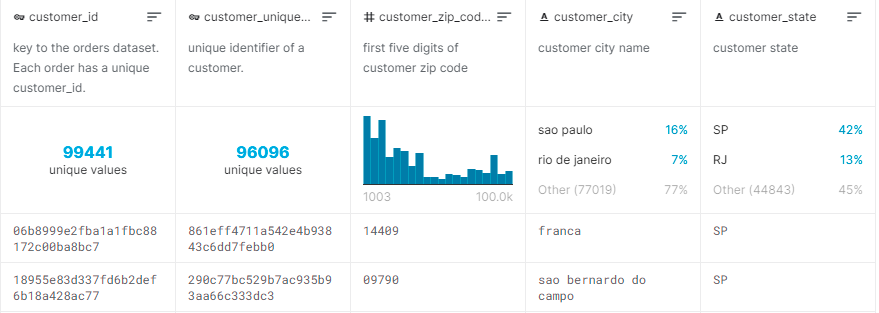


* **Geolocation Dataset**:
This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.
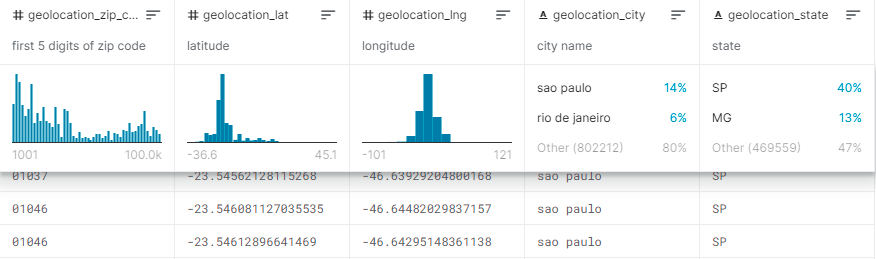


* **Order Items Dataset**:
This dataset includes data about the items purchased within each order.<br>
Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.<br>
The total order_item value is: 21.33 * 3 = 63.99 <br>
The total freight value is: 15.10 * 3 = 45.30 <br>
The total order value (product + freight) is: 45.30 + 63.99 = 109.29 
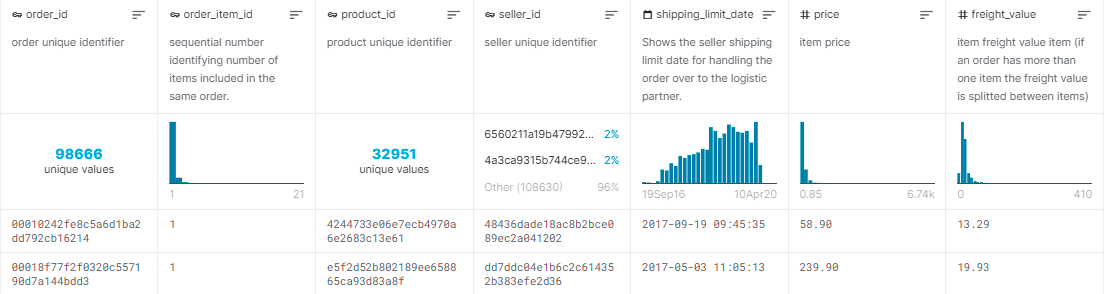


* **Payments Dataset**: 
This dataset includes data about the orders payment options.
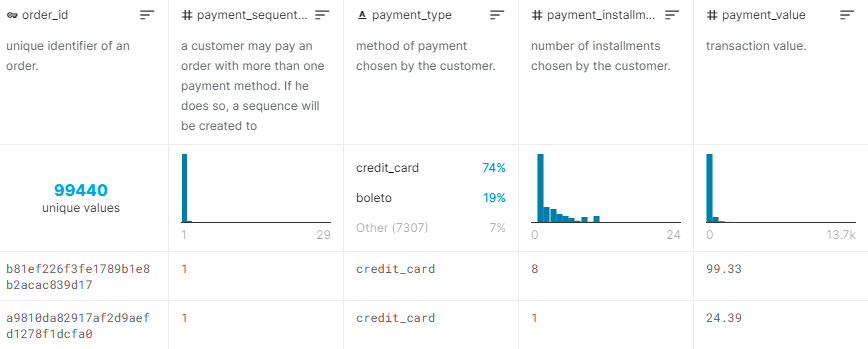


* **Order Reviews Dataset**: 
This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.
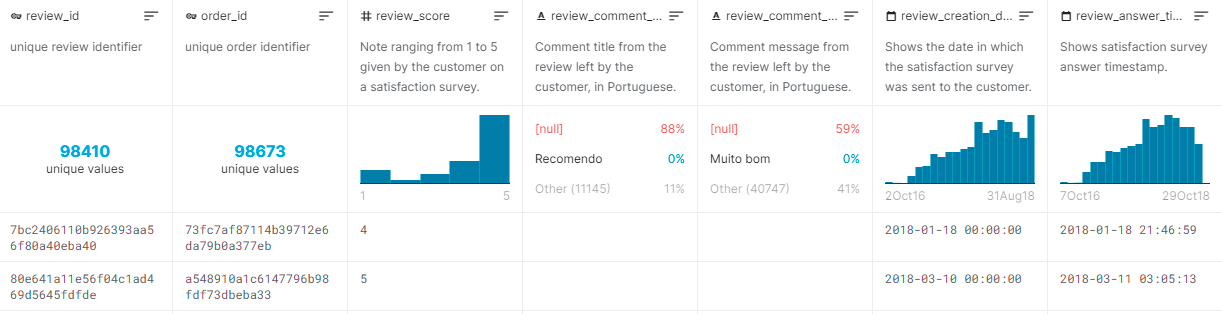


* **Order Dataset**:
This is the core dataset. From each order you might find all other information.
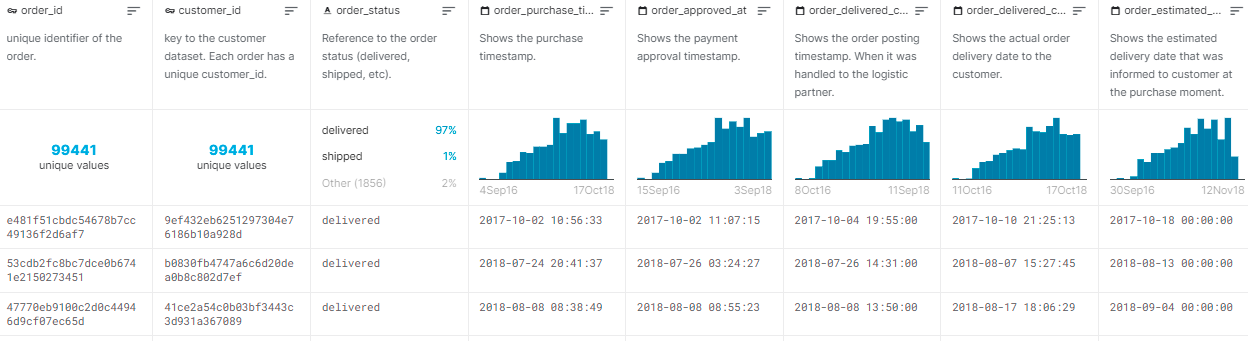


* **Products Dataset**:
This dataset includes data about the products sold by Olist.
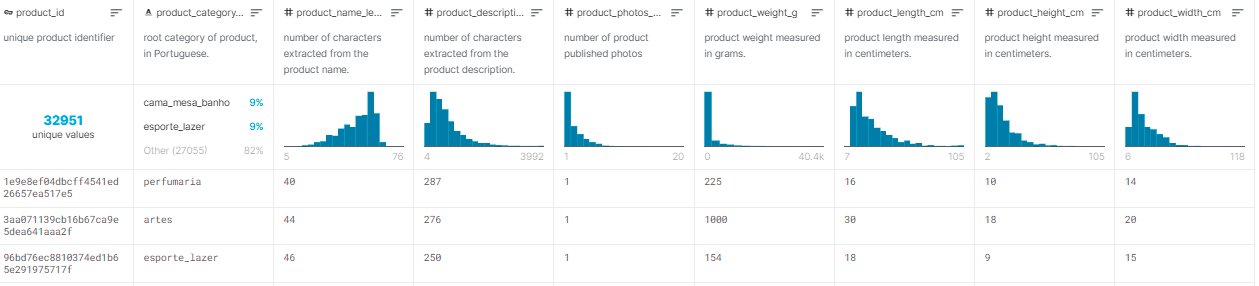


* **Sellers Dataset**:
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.
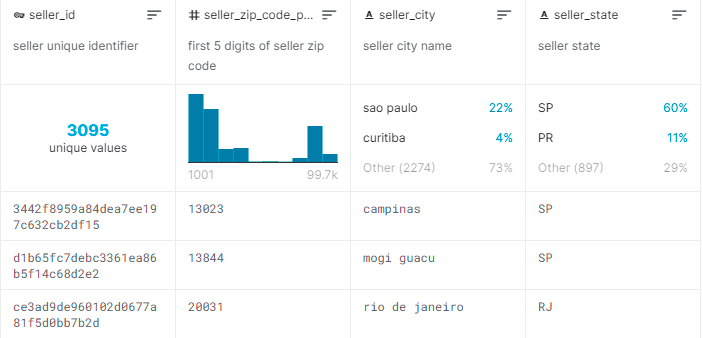


* **Category Name Translation**:
Translates the productcategoryname to english.
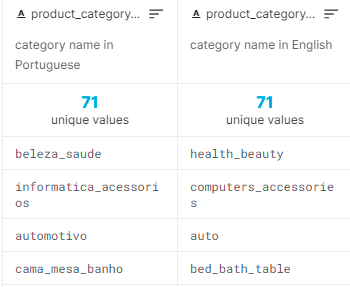

In [4]:
def same_col(folder):
    for i in range(len(folder)):
        files = folder.copy()
        nam = names.copy()
        files.pop(i)
        nam.pop(i)
        for j in range(len(files)):
            for col_a in folder[i].columns.values.tolist():
                for col_b in files[j].columns.values.tolist():
                    if col_a == col_b:
                        print('{}/{}:{}'.format(names[i],nam[j],col_b))
        print('')

same_col(data)

customers/orders:customer_id


orders/customers:customer_id
orders/order_items:order_id
orders/order_payments:order_id
orders/order_reviews:order_id

order_items/orders:order_id
order_items/order_payments:order_id
order_items/order_reviews:order_id
order_items/products:product_id
order_items/sellers:seller_id

order_payments/orders:order_id
order_payments/order_items:order_id
order_payments/order_reviews:order_id

order_reviews/orders:order_id
order_reviews/order_items:order_id
order_reviews/order_payments:order_id

products/order_items:product_id
products/name_translation:product_category_name

sellers/order_items:seller_id

name_translation/products:product_category_name



In [5]:
from collections import Counter
pd_custord = pd.merge(customers,orders)
# print(pd_custord.head())
print(len(Counter(pd_custord.customer_state)))
# Counter(pd_custord.order_status)
print(len(Counter(pd_custord.customer_city)))
pd_custord.isna().sum()

27
4119


customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
len(Counter(customers.customer_zip_code_prefix))
len(Counter(customers.customer_city))

4119

In [7]:
len(Counter(customers.customer_id))
len(Counter(customers.customer_city))

4119

In [8]:
pd_customers_ord_rev = pd.merge(pd_custord, order_reviews)
pd_customers_ord_rev_pay = pd.merge(pd_customers_ord_rev, order_payments)
pd_customers_ord_rev_pay_it = pd.merge(pd_customers_ord_rev_pay,order_items)
pd_customers_ord_rev_pay_it_prod = pd.merge(pd_customers_ord_rev_pay_it,products)
pd_customers_ord_rev_pay_it_prod_sell = pd.merge(pd_customers_ord_rev_pay_it_prod, sellers)

In [9]:
# pd_customers_ord_rev_pay_it_prod_sell.info()
# len(Counter(customers.customer_id))
def countbycat(dataframe, col):
    unique, countby = np.unique(dataframe[col], return_counts=True)
    df = pd.DataFrame(countby, unique, columns=dict(Count=countby)).sort_values(by='Count', ascending=False)
    return df

countbycat(pd_customers_ord_rev_pay_it_prod_sell,'customer_unique_id')
# identification des clients réguliers

,Count
9a736b248f67d166d2fbb006bcb877c3,75
6fbc7cdadbb522125f4b27ae9dee4060,38
f9ae226291893fda10af7965268fb7f6,35
8af7ac63b2efbcbd88e5b11505e8098a,29
569aa12b73b5f7edeaa6f2a01603e381,26
...,...
5b9a423471efacaa2b6d3ff74db0a572,1
5b99cd9116cb95dca128af1688ceb0bc,1
5b99b037dd23d71e703eeb9a1f643cda,1
5b990a40f0cc96373130487e69d4345f,1


<AxesSubplot:>

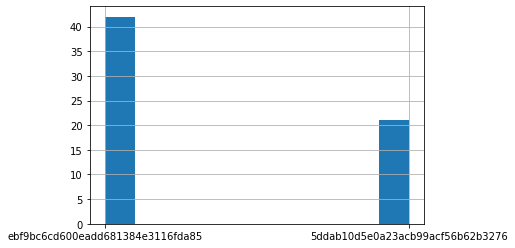

In [10]:
countbycat(pd_customers_ord_rev_pay_it_prod_sell,'order_id')
pd_customers_ord_rev_pay_it_prod_sell[pd_customers_ord_rev_pay_it_prod_sell['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']['product_id'].hist()
# customers[customers['customer_id']=='270c23a11d024a44c896d1894b261a83']
# countbycat(products, 'product_category_name')
# name_translation

# 1 customer id est associé à 1 order id ==> chaque commande est associé à un id client unique
# 1 customer_unique_id peut être associé à plusieurs_order_id/ et product_id => un client peut faire plusieurs commandes (order_id) et commander plusieurs produits (product_id)
# 1 order id + customer_id peut être associé à plusieurs product_id => plusieurs produits différents + un même produits plusieurs fois

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


<AxesSubplot:>

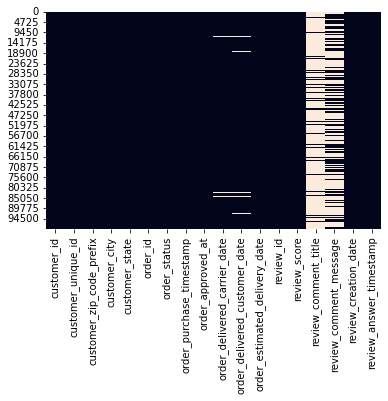

In [11]:
print(pd_customers_ord_rev_pay_it_prod_sell.isna().sum())
# sns.heatmap(pd_customers_ord_rev_pay_it_prod_sell.isna(), cbar=False)
sns.heatmap(pd_customers_ord_rev.isna(),cbar=False)

In [12]:
# vérfier les doublons
dataa = data.copy()
dataa.pop(1)
for file in dataa:
    print(file.duplicated().sum())

0
0
0
0
0
0
0
0


In [13]:
# retirer les variables qui ne nous intéressent pas
reviews_clean = order_reviews.drop(['review_comment_title','review_comment_message','review_answer_timestamp'], axis=1)
product_clean = products[['product_id','product_category_name','product_photos_qty']]
order_clean = orders.drop(['order_approved_at','order_delivered_carrier_date'], axis=1)
order_clean = pd.merge(order_clean, order_items)

# merge des fichiers cleans
pd_clean = pd.merge(customers, order_clean)
pd_clean = pd.merge(pd_clean, reviews_clean)
pd_clean = pd.merge(pd_clean, order_payments)
pd_clean = pd.merge(pd_clean,product_clean)
pd_clean = pd.merge(pd_clean, sellers)

<AxesSubplot:>

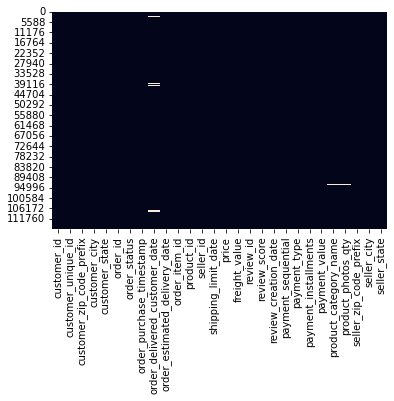

In [14]:
sns.heatmap(pd_clean.isna(), cbar=False)

In [15]:
# conversion des colonnes dates
pd_clean.filter(like='date', axis=1)

def col2datetime(df):
    datelist = df.filter(like='date', axis=1).columns.values.tolist()
    for col in datelist:
        df[col] = pd.to_datetime(df[col])
    return df

pd_clean = col2datetime(pd_clean)
pd_clean.filter(like='date', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_delivered_customer_date  114858 non-null  datetime64[ns]
 1   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 2   shipping_limit_date            117329 non-null  datetime64[ns]
 3   review_creation_date           117329 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.5 MB


In [47]:
df = pd_clean
df = df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'})

# Calcul de la fréquence rFm
# df['total_pay'] = df.payment_value * df.payment_installments
freq = df.groupby('customer_unique_id')['order_id'].count()

# Calcul de la monetary rfM
totalpaybycust = df.groupby('customer_unique_id')['payment_value'].sum()
totalpaybycust = totalpaybycust.reset_index(level='customer_unique_id', name='monetary')
pd_rfm = pd.merge(freq, totalpaybycust, on='customer_unique_id').rename(columns={'order_id':'frequency'})
pd_rfm.sort_values(ascending=False, by='monetary')
totalpaybycust


,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
94716,fffea47cd6d3cc0a88bd621562a9d061,84.58
94717,ffff371b4d645b6ecea244b27531430a,112.46
94718,ffff5962728ec6157033ef9805bacc48,133.69


In [48]:
# Calcul de la recency Rfm
df_sort = df.sort_values(ascending=False, by='order_purchase_timestamp')
df_recency = df_sort.groupby('customer_unique_id')['order_purchase_timestamp'].first().sort_values()
df_rec = df_recency.copy()
df_recency = df_rec.reset_index(level='customer_unique_id', name='more_recent_purchase_date')
df_recency['more_recent_purchase_date'] = pd.to_datetime(df_recency['more_recent_purchase_date'])
max_date = pd.to_datetime(max(df['order_purchase_timestamp']))

print(df_recency.tail())
print(max_date)

df_recency['recency']= (max_date-df_recency['more_recent_purchase_date']).dt.days
# df_recency.sort_values(by='more_recent_purchase_date')

pd_rfm = pd.merge(pd_rfm,df_recency.drop('more_recent_purchase_date',axis=1))
pd_rfm
# df_recency[df_recency['diff_days']==0]
# type(df.order_purchase_timestamp[1])
# df_recency.info()
# df_recency.info()

                     customer_unique_id more_recent_purchase_date
94715  5c58de6fb80e93396e2f35642666b693       2018-08-29 14:18:23
94716  7febafa06d9d8f232a900a2937f04338       2018-08-29 14:18:28
94717  b701bebbdf478f5500348f03aff62121       2018-08-29 14:52:00
94718  24ac2b4327e25baf39f2119e4228976a       2018-08-29 15:00:37
94719  ff22e30958c13ffe219db7d711e8f564       2018-09-03 09:06:57
2018-09-03 09:06:57


,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,118
2,0000f46a3911fa3c0805444483337064,1,86.22,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,325
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,292
...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,451
94716,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,266
94717,ffff371b4d645b6ecea244b27531430a,1,112.46,572
94718,ffff5962728ec6157033ef9805bacc48,1,133.69,123


C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

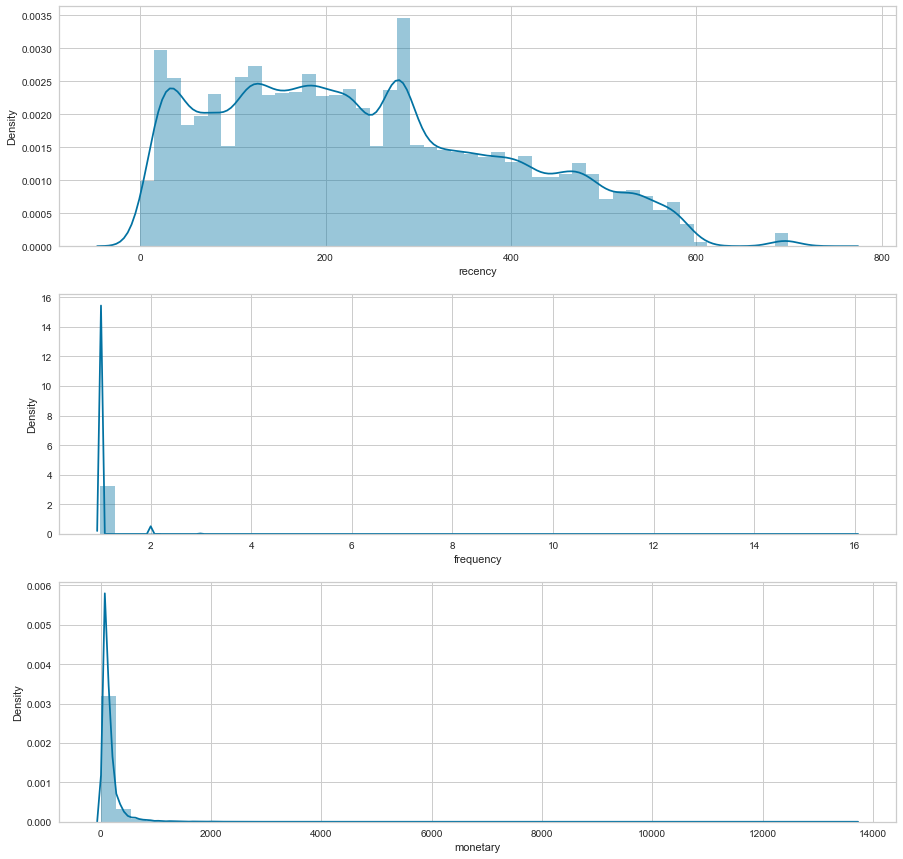

In [49]:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1); sns.distplot(pd_rfm['recency'])
plt.subplot(3, 1, 2); sns.distplot(pd_rfm['frequency'])
plt.subplot(3, 1, 3); sns.distplot(pd_rfm['monetary'])
plt.show()

C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


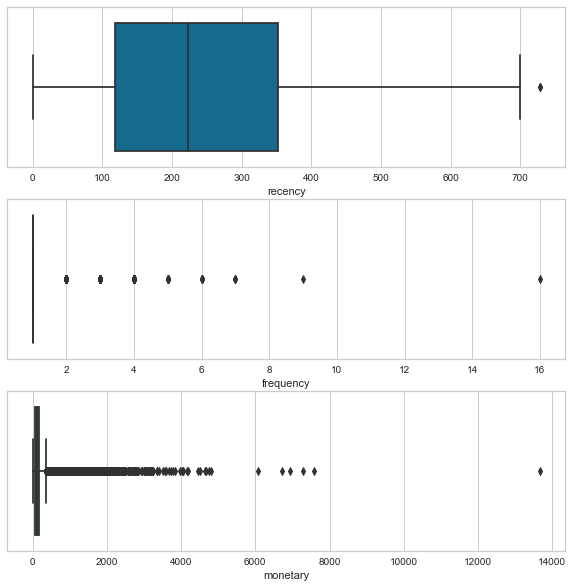

In [50]:
# Outliers check in
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1); sns.boxplot(pd_rfm['recency'])
plt.subplot(3, 1, 2); sns.boxplot(pd_rfm['frequency'])
plt.subplot(3, 1, 3); sns.boxplot(pd_rfm['monetary'])
plt.show()

In [51]:
# Gestion des outliers for monetary
Q1 = pd_rfm.monetary.quantile(0.05)
Q3 = pd_rfm.monetary.quantile(0.95)
IQ = Q3-Q1
pd_rfm=pd_rfm[(pd_rfm['monetary']>=Q1-1.5*IQ) & (pd_rfm['monetary']<=Q3+1.5*IQ)]

C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


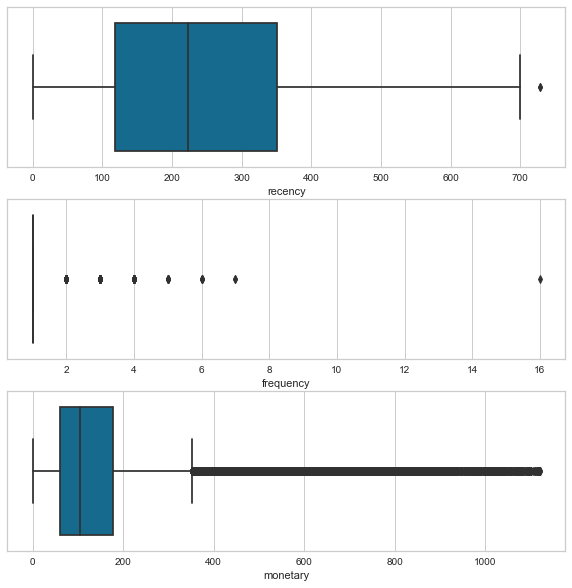

In [52]:
# Outliers check in
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1); sns.boxplot(pd_rfm['recency'])
plt.subplot(3, 1, 2); sns.boxplot(pd_rfm['frequency'])
plt.subplot(3, 1, 3); sns.boxplot(pd_rfm['monetary'])
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

pd_rfm_scaled = pd_rfm[['monetary', 'frequency', 'recency']]
scaler = StandardScaler()

# fit_transform
pd_rfm_scaled = pd.DataFrame(scaler.fit_transform(pd_rfm_scaled), columns=['monetary', 'frequency', 'recency'])
pd_rfm_scaled.describe()

,monetary,frequency,recency
count,9.382600e+04,9.382600e+04,9.382600e+04
mean,-3.912866e-17,-1.135912e-15,3.108473e-17
std,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.024154e+00,-1.606127e-01,-1.583447e+00
25%,-6.023274e-01,-1.606127e-01,-8.127383e-01
50%,-2.961922e-01,-1.606127e-01,-1.269382e-01
75%,2.014936e-01,-1.606127e-01,7.090848e-01
max,6.727768e+00,7.282768e+01,3.171434e+00


,monetary,frequency,recency
monetary,1.000000,0.157210,-0.008485
frequency,0.157210,1.000000,-0.020724
recency,-0.008485,-0.020724,1.000000


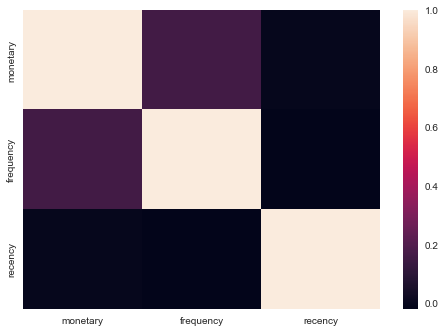

In [54]:
sns.heatmap(pd_rfm_scaled.corr())
pd_rfm_scaled.corr()
# à priori on ne peut pas établir de liens entre les 3 paramètres

In [55]:
# K means clustering for RFM 
k_means = KMeans(n_clusters=4, max_iter=50)
k_means.fit(pd_rfm_scaled)
Counter(k_means.labels_)

Counter({0: 48857, 2: 35901, 3: 6265, 1: 2803})

In [56]:
ssd = []
sscores = []
cluster_lab_max = []

for i in range(1,10):
    print(i)
    n=i+1
    k_means = KMeans(n_clusters=n, max_iter=50).fit(pd_rfm_scaled)
    cluster_labels = k_means.labels_
    # silhouette score
    silhouette_avg = silhouette_score(pd_rfm_scaled, cluster_labels)    
    ssd.append(k_means.inertia_)
    sscores.append(silhouette_avg)
    max_score = max(sscores)
    if max_score < silhouette_avg:
        n_cluster_max = i+1
        max_score = silhouette_avg
        cluster_lab_max = cluster_labels


print(max_score)
print(Counter(cluster_lab_max))
# inertia : Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

1
2
3
4
5
6
7
8
9


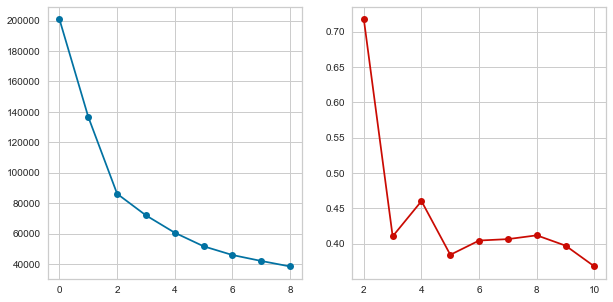

In [57]:
n_clusters = np.arange(2,11)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1);plt.plot(ssd, '-o')
plt.subplot(1,2,2);plt.plot(n_clusters,sscores, 'r-o')

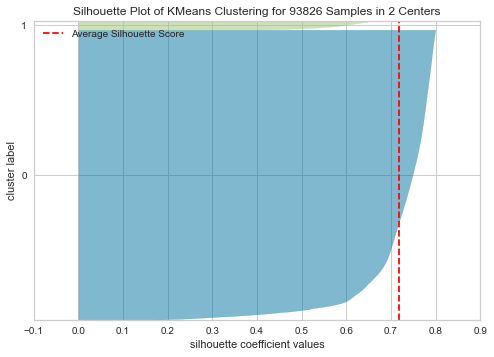

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93826 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(algorithm='auto', copy_x=True,
                                      init='k-means++', max_iter=50,
                                      n_clusters=2, n_init=10, n_jobs=None,
                                      precompute_distances='auto',
                                      random_state=None, tol=0.0001,
                                      verbose=0),
                     is_fitted='auto')

In [58]:
k_means2 = KMeans(2,max_iter=50)
silhouette_visualizer(k_means2,pd_rfm_scaled,colors='yellowbrick')

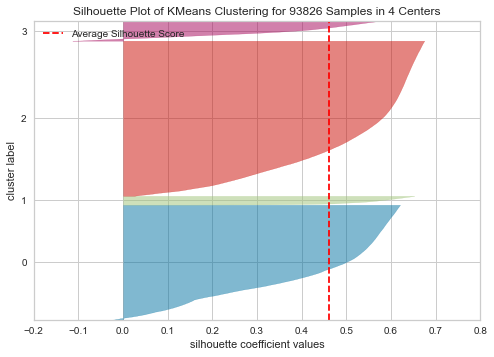

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93826 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(algorithm='auto', copy_x=True,
                                      init='k-means++', max_iter=50,
                                      n_clusters=4, n_init=10, n_jobs=None,
                                      precompute_distances='auto',
                                      random_state=None, tol=0.0001,
                                      verbose=0),
                     is_fitted='auto')

In [65]:
k_means4 = KMeans(4, max_iter=50)
silhouette_visualizer(k_means,pd_rfm_scaled,colors='yellowbrick')

In [66]:
k_means4 = k_means
pd_rfm['clusters']= k_means4.labels_
pd_rfm.head()

C:\Users\Lenovo\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_unique_id,frequency,monetary,recency,clusters
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,115,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,118,2
2,0000f46a3911fa3c0805444483337064,1,86.22,541,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,325,0
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,292,0


<AxesSubplot:xlabel='clusters', ylabel='frequency'>

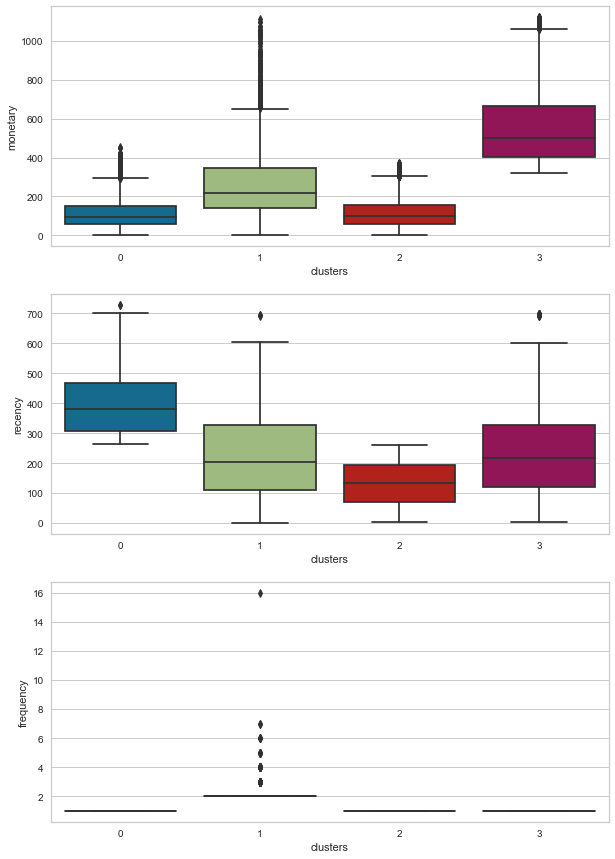

In [71]:
plt.figure(figsize=(10,15))
plt.subplot(311); sns.boxplot(x='clusters', y='monetary', data=pd_rfm)
plt.subplot(312); sns.boxplot(x='clusters', y='recency', data=pd_rfm)
plt.subplot(313); sns.boxplot(x='clusters', y='frequency', data=pd_rfm)

<AxesSubplot:xlabel='clusters', ylabel='frequency'>

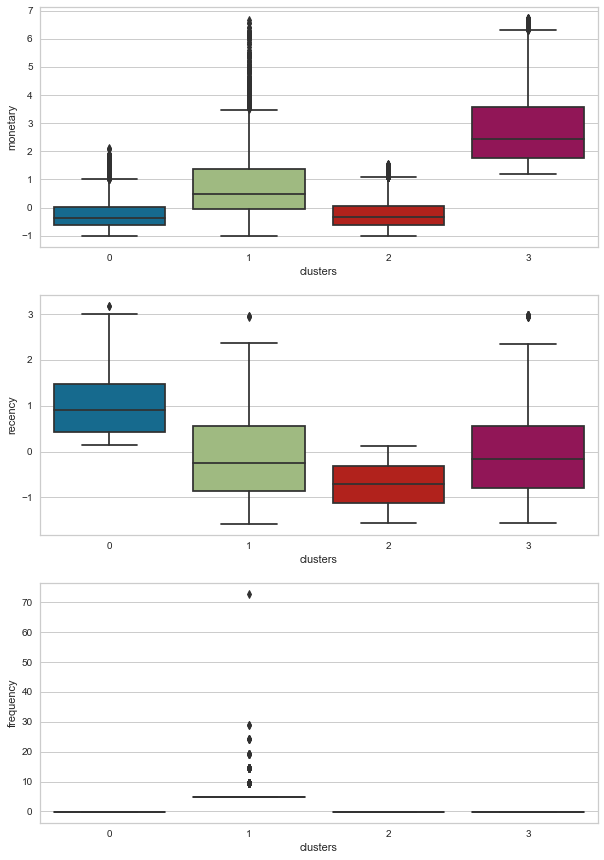

In [72]:
plt.figure(figsize=(10,15))
pd_rfm_scaled['clusters']= k_means4.labels_
plt.subplot(311); sns.boxplot(x='clusters', y='monetary', data=pd_rfm_scaled)
plt.subplot(312); sns.boxplot(x='clusters', y='recency', data=pd_rfm_scaled)
plt.subplot(313); sns.boxplot(x='clusters', y='frequency', data=pd_rfm_scaled)

<AxesSubplot:xlabel='recency', ylabel='monetary'>

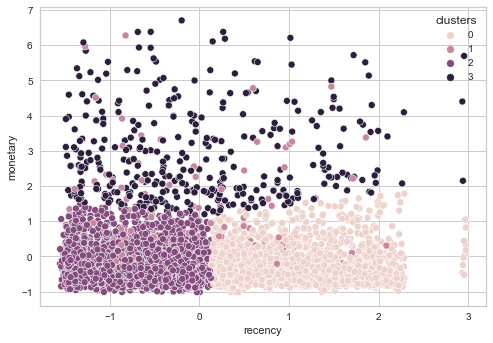

In [87]:
sns.scatterplot(x='recency',y='monetary',data=pd_rfm_scaled[:5000],hue='clusters')

<AxesSubplot:xlabel='monetary', ylabel='frequency'>

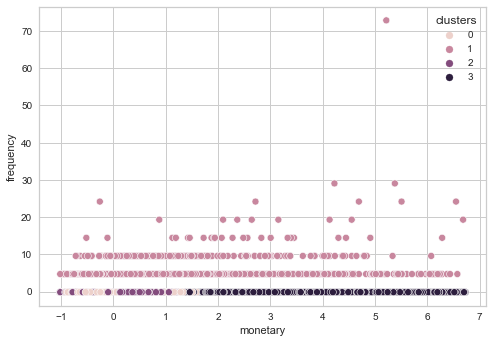

In [83]:
sns.scatterplot(x='monetary',y='frequency',data=pd_rfm_scaled,hue='clusters')

## Section test et compréhension des datas 

In [60]:
df_test = pd_clean[pd_clean.customer_unique_id == '0a0a92112bd4c708ca5fde585afaa872'][['order_item_id','price','freight_value','payment_value']]
df_test['total_purchase_price'] = df_test.order_item_id*(df_test.price + df_test.freight_value)
df_test
# df_test['total_purchase_price'] = total_item_price* df_test.order_item_id

,order_item_id,price,freight_value,payment_value,total_purchase_price
107672,1,1680.0,28.01,13664.08,1708.01
107673,2,1680.0,28.01,13664.08,3416.02
107674,3,1680.0,28.01,13664.08,5124.03
107675,4,1680.0,28.01,13664.08,6832.04
107676,5,1680.0,28.01,13664.08,8540.05
107677,6,1680.0,28.01,13664.08,10248.06
107678,7,1680.0,28.01,13664.08,11956.07
107679,8,1680.0,28.01,13664.08,13664.08


In [89]:
# extraire les lignes associées à customer_unique_id
# explication du paiement séquentiel
df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3'].iloc[:,9:19]
df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3']
df_9a = df[df.customer_unique_id == '9a736b248f67d166d2fbb006bcb877c3'].loc[df['customer_id']=='7cfe09e5bc5e9f1fab1a57d8ddd8eaee'][['order_purchase_timestamp','payment_sequential','payment_installments','payment_value','total_pay','order_purchase_timestamp','freight_value','price']].sort_values(ascending=True, by='payment_sequential')
df_9a['total_pay_cum']=df_9a.total_pay.cumsum()
df_9a['total_price']=df_9a.price + df_9a.freight_value
df_9a
# df.groupby('customer_unique_id')['order_item_id'].sum().sort_values(ascending=False)

,order_purchase_timestamp,payment_sequential,payment_installments,payment_value,order_purchase_timestamp,freight_value,price,total_pay_cum,total_price
65823,2017-07-27 12:50:46,7,1,1.27,2017-07-27 12:50:46,26.97,45.2,1.27,72.17


## Ressources